# Introduction

_Describe the problem the software solves and why it's important to solve that problem._

* Our software package, _ad-AHJZ_, computes gradients by leveraging the technique of automatic differentiation. Before we can understand automatic differentiation, we must first describe and motivate the importance of differentiation itself. Derivatives are vital to quantifying the change that’s occurring over a relationship between multiple factors. Finding the derivative of a function measures the sensitivity to change of a function value with respect to a change in its input argument. Derivatives generalize across multiple scenarios and are well defined for both scalar inputs and outputs, as well as vector inputs and outputs. Derivatives are not only essential in calculus applications like numerically solving differential equations and optimizing and solving linear systems, but are useful in many real world, scientific settings. For example, in finance they help analyze the change regarding the profit/loss for a business or finding the minimum amount of material to construct a building. In physics, they help calculate the speed and distance of a moving object. Derivatives are crucial to understanding how such relationships move and change.



* To perform differentiation, two different approaches are solving the task symbolically or numerically computing the derivatives. Symbolic differentation yields accurate answers, however depending on the complexity of the function, it could be expensive to evaluate and result in inefficient code. On the other hand, numerically computing derivatives is less expensive, however it suffers from potential issues with numerical stability and a loss of accuracy.   


* Our software package, _ad-AHJZ_, overcomes the shortcomings of both the symbolic and numerical approach. Our package uses automatic differentiation which is less costly than symbolic differentiation, but evaluates derivatives at machine precision. The technique leverages both forward mode and backward mode and evaluates each step with the results of previous computations or values. As a result of this, automatic differentiation avoids finding the entire analytical expresssion to compute the derivative and is hence iteratively evaluating a gradient based on input values. Thus, based on these key advantages, our library implements and performs forward mode automatic differentiation to efficiently and accurately compute derivatives.

# Background

_Describe (briefly) the mathematical background and concepts as you see fit._


#### Part 1: Chain Rule

The underlying motivation of automatic differentiation is the Chain Rule that enables us to decompose a complex derivative into a set of derivatives involving elementary functions of which we know explicit forms. 

We will first introduce the case of 1-D input and generalize it to multidimensional inputs.

_One-dimensional (scalar) Input_: Suppose we have a function $ f(y(t)) $ and we want to compute the derivative of $ f $ with respect to $ t $. This derivative is given by:

$$
\begin{align}
\frac{\partial f}{\partial t} = \frac{\partial f}{\partial y} \frac{\partial y}{\partial t}\\
\end{align}
$$

Before introducing vector inputs, let's first take a look at the gradient operator $ \nabla $

That is, for  $ y\colon \mathbb {R} ^{n} \to \mathbb {R} $, its gradient $ \nabla y \colon \mathbb {R} ^{n} \to \mathbb {R} ^{n}$ is defined at the point $ x = (x_1, ..., x_n) $ in n-dimensional space as the vector:

$$
\begin{align}
\nabla y(x) =
\begin{bmatrix}
{\frac {\partial y}{\partial x_{1}}}(x)
\\
\vdots 
\\
{\frac {\partial y}{\partial x_{n}}}(x)
\end{bmatrix}
\end{align}
$$

_Multi-dimensional (vector) Inputs_: Suppose we have a function $ f(y_1(x), ..., y_n(x)) $ and we want to compute the derivative of $ f $ with respect to $ x $. This derivative is given by:

$$
\begin{align}
\nabla f_x = \sum_{i=1}^n \frac{\partial f}{\partial y_i} \nabla y_i(x)\\
\end{align}
$$

We will introduce direction vector $ p $ later to retrieve the derivative with respect to each $ y_i $. 

#### Part 2: Jacobian-vector Product

The Jacobian-vector product is equivalent to the tangent trace in direction $ p $ if we input the same direction vector $p$:

$ D_p v $ = $ J p $ 

#### Part 3: Seed Vector

Seed vectors provide an efficient way to retrieve every element in a Jacobian matrix and also recover the full Jacobian in high dimensions.

_Scenario:_ Seed vectors often come into play when we want to find $ \frac {\partial f_i} {\partial x_j} $, which corresponds to the $i, j$ element of the Jacobian matrix. 

_Procedure:_ In high dimension automatic differentiation, we will apply seed vectors at the end of the evaluation trace where we have recursively calculated the explicit forms of tangent trace of $ f_i $s and then multiply each of them by the indicator vector $ p_j $ where the $ j $-th element of the $ p $ vector is 1. 


#### Part 4: Evaluation (Forward) Trace

_Definition_: Suppose x = $ \begin{bmatrix} {x_1} \\ \vdots \\ {x_m} \end{bmatrix} $, we defined $ v_{k - m} = x_k $ for $ k = 1, 2, ..., m $ in the evaluation trace.

_Motivation_: The evaluation trace introduces intermediate results $ v_{k-m} $ of elementary operations to track the differentiation.

Consider the function $ f(x):\mathbb{R}^2 \to \mathbb{R} $:

$ f(x) = log(x_1) + sin(x_1 + x_2) $

We want to evaluate the gradient $ \nabla f $ at the point $ x = \begin{bmatrix} 7 \\ 4 \end{bmatrix} $. Computing the gradient manually: 

$ \nabla f = \begin{bmatrix} \frac {\partial f} {\partial x_1} \\ \frac {\partial f} {\partial x_2} \end{bmatrix}  = \begin{bmatrix} \frac {1} {x_1} + \cos(x_1 + x_2) \\ \cos(x_1 + x_2) \end{bmatrix} = \begin{bmatrix} \frac {1} {7} + \cos(11) \\  \cos(11) \end{bmatrix}$

| Forward primal trace | Forward tangent trace | Pass with p = $[0, 1]^T$ | Pass with p = $[1, 0]^T$ |
| --- | --- | --- | --- |
| $v_{-1} = x_1$ | $ p_1 $ | 1 | 0 |
| $v_{0} = x_2$ | $ p_2 $ | 0 | 1 |
| $v_{1} = v_{-1} + v_0$ | $ D_p v_{-1} + D_p v_0 $ | 1 | 1 |
| $v_{2} = sin(v_1)$ | $ \cos(v_1) D_p v_1 $ | $ \cos(11) $ | $ \cos(11) $ |
| $v_{3} = log(v_{-1})$ | $ \frac {1} {v_{-1}} D_p v_{-1} $ | $ \frac {1} {7} $ | 0 |
| $v_{4} = v_3 + v_2 $ | $ D_p v_{3} + D_p v_2 $ | $ \frac {1} {7} + \cos(11) $ | $ \cos(11) $ |

$D_p v_{-1} = \nabla v_{-1}^T p = (\frac {\partial v_{-1}} {\partial x_1} \nabla x_{1})^T p = (\nabla x_{1})^T p = p_1$

$D_p v_{0} = \nabla v_{0}^T p = (\frac {\partial v_{0}} {\partial x_2} \nabla x_{2})^T p = (\nabla x_{2})^T p = p_2$

$D_p v_{1} = \nabla v_{1}^T p = (\frac {\partial v_{1}} {\partial v_{-1}} \nabla v_{-1} + \frac {\partial v_{1}}{\partial v_{0}} \nabla v_{0})^T p = (\nabla v_{-1} + \nabla v_0)^T p = D_p v_{-1} + D_p v_0$

$D_p v_{2} = \nabla v_{2}^T p = (\frac {\partial v_{2}} {\partial v_{1}} \nabla v_1)^T p = \cos(v_1) (\nabla v_1)^T p = \cos(v_1) D_p v_1$

$D_p v_{3} = \nabla v_{3}^T p = (\frac {\partial v_{3}} {\partial v_{-1}} \nabla v_{-1})^T p = \frac {1} {v_{-1}} (\nabla v_{-1})^T p = \frac {1} {v_{-1}} D_p v_{-1}$

$D_p v_{4} = \nabla v_{4}^T p = (\frac {\partial v_{4}} {\partial v_3} \nabla v_{3} + \frac {\partial v_{4}}{\partial v_{2}} \nabla v_{2})^T p = (\nabla v_{3} + \nabla v_2)^T p = D_p v_{3} + D_p v_2$

#### Part 5: Computation (Forward) Graph

We have connected each $ v_{k-m} $ to a node in a graph for a visualization of the ordering of operations.

From the above example, its computational graph is given by: 

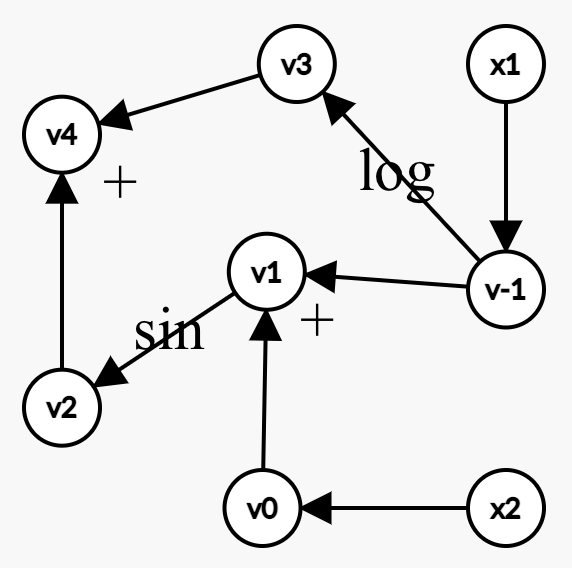

#### Part 6: Computing the Derivative 

Let's generalize our findings:

From the table, we retrieved a pattern as below:

$$ D_p v_j = (\nabla v_j)^T p = (\sum_{i < j} \frac{\partial{v_j}} {\partial{v_i}} \nabla v_i)^T p = \sum_{i < j} \frac{\partial{v_j}} {\partial{v_i}} (\nabla v_i)^T p = \sum_{i < j} \frac{\partial{v_j}} {\partial{v_i}} D_p v_i$$ 

_Higher dimension_: We recursively apply the same technique introduced above to each entry of the vector valued function _f_.


#### Part 7: Efficiency of Forward Mode 

Forward mode is efficient in the sense that it does not need to store the parent node, which is different from reverse mode (see below) where the whole computational graph must be stored.

#### Part 8: Reverse Mode
The mechanism of reverse mode is defined as the following:

_Step 1:_ Calculate $ \frac {\partial f} {\partial v_j} $

_Step 2:_ Calculate $ \frac {\partial v_{j}} {\partial v_i} $ where $ v_i $ is the immediate predecessor of $ v_j $

_Step 3:_ Multiply the result obtained in step 1 and step 2, which results in the following:
$ \frac {\partial f} {\partial v_j} \frac {\partial v_{j}} {\partial v_i} $

#### Part 9: Dual Number 

_Naively_: We define a dual number $ d_i = v_i + \delta_i $ where $ \delta_i = D_p v_i \epsilon $ that satisfies $ \epsilon^2 = 0 $ 

A $ k $-th differentiable function $ f $ can be written as:

$ f(d_i) = f(v_i + \delta_i) = f(v_i) + f'(v_i) \delta_i + \frac {f''(v_i)} {2!} \delta_i^2 + ... + \frac {{{f}^k}(v_i)} {k!} (\zeta - v_i)^k $ for some $ \zeta \in (v_i, v_i + \delta_i) $ by Taylor expansion. 

Now we substitute the definition of $ \delta_i $ back into the above expansion and use the fact that all higher terms go to 0 assuming $ \epsilon^2 = 0 $. We will have the following:

$ f(d_i) = f(v_i) + f'(v_i) D_p v_i \epsilon $

_Advantage_: Operations on Dual Number pertain to the form of Taylor expansion, which makes the implementation easier to retrive the value and derivative.

Consider the following example:
$$
\begin{align}
d_i &= v_i + D_p v_i \epsilon \\ 
f(d_i) &= d_i^2 = v_i^2 + 2 v_i D_p v_i \epsilon + D_p v_i^2 \epsilon^2 = v_i^2 + 2 v_i D_p v_i \epsilon \\
\end{align}
$$

where $ v_i^2 $ refers to the value and $ 2 v_i D_p v_i $ refers to the derivative.

More specifically, $ v_i^2 $ corresponds to $ f(v_i) $, $ 2 v_i $ corresponds to $ f'(v_i) $, and $ D_p v_i $ is just $ D_p v_i $.

# How to Use ad-AHJZ

_How do you envision that a user will interact with your package? What should they import? How can they instantiate AD objects?_

#### 1. __Installing the package:__
   
* 1a. User can install the package and its dependencies using the virtual environment venv:

```bash
# Create a directory to store your virtual environment(s)
mkdir ~/.virtualenvs
python3 -m venv ~/.virtualenvs/env_name
# Activate your env_name virtual environment
source ~/.virtualenvs/env_name/bin/activate
# Install the package
python3 -m pip install ad-AHJZ
python3 -m pip install -r requirements.txt
# Create a Python file to use the package in
echo >'file_name'.py
```
   
* 1b. User can install the package and its dependencies using the virtual environment conda:
 
```bash
# Create a directory to store your virtual environment(s)
mkdir 'directory_name_for_virtual_environment'
cd 'directory_name_for_virtual_environment'
conda create -n 'env_name' python=3.7 anaconda
# Activate your env_name virtual environment
source activate env_name
# Install the package
python3 -m pip install ad-AHJZ
python3 -m pip install -r requirements.txt
# Create a Python file to use the package in
echo >'file_name'.py
```
   
#### 2. __Importing the package:__

   * 2a. User imports package into the desired python file with the following line:
    
```python
from ad_AHJZ import foward_mode, # reverse_mode (once implemented)
```
    
   * 2b. User imports numpy into the desired python file with the following line:
    
```python
import numpy as np
```

    
    
#### 3. __Calling/Using package modules:__
   * 3a. Using the class forward_mode() create an automatic differentiation object that can use either a scalar or vector input to obtain both the function value and derivative. Below are examples using a scalar input and a vector input:  


   * 3b. Example of foward_mode() using a scalar input:

```python
# define desired evaluation value (scalar)
x = 0.5
# define a simple function:
f_x = lambda x: np.sin(x) + 2 * x
# create a foward_mode() object using the defined values x, f_x from above
fm = forward_mode(x, f_x)
# option 1: retrieve both the function value and the derivative using get_function_value_and_jacobian()
x, x_der = fm.get_function_value_and_jacobian()
print(x, x_der)
>>> 1.479425538604203
    [2.87758256]
# option 2: retrieve only the function value using get_function_value()
x_value = fm.get_function_value()
print(x_value)
>>> 1.479425538604203
# option 3: retrieve only the function derivative using get_jacobian()
x_derivative = fm.get_jacobian()
print(x_derivative)
>>> [2.87758256]
```
   * 3c. Example of foward_mode() using a vector input:
   
```python
# define desired evaluation value (scalar)
multi_input = [0.5, 1]
# define a simple function:
f_xy = lambda x, y: np.sin(x) + 2 * y
# create a foward_mode() object using the defined values x, f_x from above
fm = forward_mode(multi_input, f_xy)
# option 1: retrieve both the function value and the jacobian using get_function_value_and_jacobian()
multi_xy, multi_xy_der = fm.get_function_value_and_jacobian()
print(multi_xy, multi_xy_der)
>>> 2.479425538604203
    [0.87758256 2.        ]
# option 2: retrieve only the function value using get_function_value()
multi_xy_value = fm.get_function_value()
print(multi_xy_value)
>>> 2.479425538604203
# option 3: retrieve only the function jacobian using get_jacobian()
multi_xy_derivative = fm.get_jacobian()
print(multi_xy_derivative)
>>> [0.87758256 2.        ]
```

# Software Organization

_Discuss how you plan on organizing your software package._


#### 1. __Directory Structure:__
   * 1a. We include our project directory structure in the image below. Our package is called _ad-AHJZ_, where our code for automatic differentiation lies within "ad_AHJZ", our milestone documentation lies within "docs", all unit testing files are located in "testing", and the root of the directory holds our readme.md, license, .gitignore, .coveragerc, codecov.yml, setup.cfg, setup.py, and requirements.txt file.
    
    
   * 1b. Directory structure layout:
   
   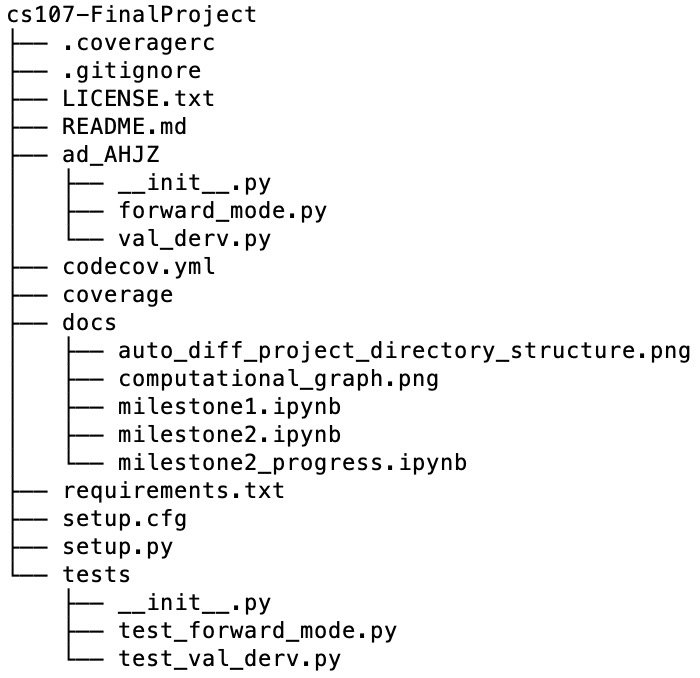


#### 2. __Modules:__

   * 2a. _val_derv.py_: This file contains the class definition of a value/derivative object. It contains methods to initialize the object, set and get the function and derivative value of the object, and overload elementary operations. Specifically, we overload addition, multiplication, division, negation, power, reverse addition, reverse subtraction, reverse multiplication, and reverse division. Finally, we include elementary functions on these objects including 'sqrt', 'log', 'exp', 'sin', 'cos', 'tan', 'sinh', 'cosh', 'tanh', 'arcsin', 'arccos', and 'arctan'. This is not a file which the user will interact with.
   
   
   * 2b. _forward_mode.py_: This file contains the class definition to perform forward mode automatic differentiation. This is the module which the user will interact with to compute function values and derivatives using forward mode. Specifically, the user will create forward mode objects using the function they are interested in computing the derivative of and the point or vector at which to evaluate the function at. Next, after initialization, they can make use of get_function_value() to retrieve function values, get_jacobian to retrieve derivative values, and get_function_value_jacobian() to retrieve both the function and derivative values. 
   
   
   * 2c. \_\__init.py\_\__:  This file contains information relevant to how each of the modules associated with our package ad-AHJZ interact with one another. 
   
   
   * 2d . _reverse_mode.py_: This file (once implemented) will contain the class definition to perform reverse mode automatic differentiation. This is the module which the user will interact with to compute function values and derivatives using reverse mode. Specifically, the user will create forward mode objects using the function they are interested in computing the derivative of and the point or vector at which to evaluate the function at. Next, after initialization, the user will call the methods on this objects to retrieve function and derivative values.  
  

#### 3. __Test Suite Location:__
   * 3a. The test suite live in the "testing" directory which is a subdirectory found off the root directory (see 1. Directory Structure). The "testing" directory contains all unit tests and integration tests.
   
   
   * 3b. Our testing suite is built using Python's unittest framework. We have two files for testing, which are test_val_derv.py and test_forward_mode.py. The first file tests scalar inputs for val_derv.py to ensure all overloaded operations and elementary functions are implemented correctly and the second file tests forward_mode.py to ensure the automatic differentiation is performed correctly in terms of computing function values and derivatives. We run our tests by running "coverage run  -m unittest discover -s tests/" in the root directory. 
    
    
   * 3c. To ensure our testing procedure has complete code coverage, we leverage CodeCov. CodeCov enables us to quickly understand which lines are being executed in our test cases. We directly upload our coverage reports to CodeCov through the use of a bash script and the .coveragerc, coverage, and codecov.yml files.
    
#### 4. __Package Distribution and Installation:__
   * 4a. Our package is distributed via PyPI. We have uploaded the package to PyPI using the setup.py and setup.cfg files which contain relevant information about our package as well as the version number, associated dependencices, and the license.  
   
   
   * 4b. A user can install our package by creating a virtual environment as shown in _Installing the package_ under the " How to Use ad-AHJZ" heading earlier. Once a virtual environment has been created, the user can install our package by running the following lines: 
   
``` bash
python3 -m pip install ad-AHJZ
python3 -m pip install -r requirements.txt
```
* 4c: After installing our package, a user can import it into their desired python file and use it by including the following two lines at the top of their file: 
```python
from ad_AHJZ import foward_mode, # reverse_mode (once implemented)
import numpy as np
```

#### 5. __Package Dependencies__
   * 5a. The only library dependency our package relies on is numpy. We designed our software in this manner to ensure that we are not creating multiple external dependencies and thereby increase our software's reliability.


# Implementation

_Discuss how you plan on implementing the forward mode of automatic differentiation._

#### 1.  __Core Data Structure:__
   * 1a. Our primary core data structure is going to be a dictionary to store each node in the computational graph that uses the tangent trace and primal trace to compute the partial differentiation and function value for a specific variable. More specifically, the keys would be the node of the computational graph (state name) and the values are going to be a tuple that holds the associated operation at the specific state (function value and derivative).  
      
      
#### 2.  __Classes:__
    
   * 2a. _Dual Numbers_: Class which represents the way in which operations are computed for a dual number    
    
   * 2b. _Forward Mode_: Class which represents the computational graph as a dictionary and performs forward mode differentiation  
     
   * 2c. _Fast Forward Mode_ (extension module): Class which represents an optimized data structure for how to store the compututional graph and performs a faster version of forward mode differentiation.
    
    
#### 3.  __Method and Name Attributes:__
   * 3a. _Dual Numbers_:
        * Method to initialize the real value and dual number value for the input of the function          
        * Methods to overload the elementary operations for a variable that is dual number. Note that we will overload the following fourteen operators: '+', '-', '*' '/', 'sqrt(x)', 'power(x,n)', 'exp(x)', 'log(x, b)', 'ln(x)', 'sin(x)', 'cos(x)', 'tan(x)', 'cot(x)', 'csc(x)', 'sec(x)'. 
            * For example, we would use the below method to overload the "add" operation: 
            ```python  
               def __add__(self, other):
                        if isinstance(other, DualNumber):
                            return DualNumber(self.real + other.real, self.dual + other.dual)
            ```
   * 3b. _Forward Mode_:
        * Method to initialize the computational graph dictionary, its initial _x_ value, and an empty dictionary of the primal trace and tangent trace to perform forward mode automatic differentiation
        * Method to iterate through the input function and append to the primal and tangent trace dictionary
        * Method to get the node's value and partial derivative at the current step of forward mode
        * Method to obtain the primal trace to arrive at the next node's value and partial derivative
        * Method to obtain the tangent trace to arrive at the next node's value and partial derivative
        * Method to run the entire forward mode process and obtain the final function value and derivative from the computational graph.  
          
   * 3c. _Fast Forward Mode_:
        * Method to initialize the optimized computational graph data structure, its initial _x_ value, and an empty optimized structure of the primal and tangent trace to perform forward mode automatic differentiation
        * Method to iterate through the input function and append to the primal and tangent trace data structure
        * Method to get the node's value and partial derivative at the current step of forward mode
        * Method to obtain the primal trace to arrive at the next node's value and partial derivative
        * Method to obtain the tangent trace to arrive at the next node's value and partial derivative
        * Method to efficiently run the entire forward mode process and obtain the final function value and derivative from the optimized computational graph.
    
   
#### 4. __External Dependencies:__
   * 4a. The only external library we will rely on is numpy, which we will use to perform computations and evaluate small expressions with. With this being our only external dependency, our software increases its reliability and can be viewed as a near stand alone software package. 
    
    
#### 5.  __Dealing With Elementary Functions__
   * 5a. For all elementary functions like _sin_, _sqrt_, _log_, and _exp_ (and all the others mentioned in _Modules_) we will define separate methods for them in _functions.py_. This module will generalize each of the functions in order to handle both scalar and vector input. Each method will take in as an input a vector or scalar value stored at the previous node in the computational graph and output the derivative value and function value for that elementary function. We can then store the methods' outputs as a tuple in the computational graph dictionary alongside its primal and tangent traces. 
   
   * 5b. For example, we would use the below functions to implement _sin_ and _sqrt_, both of which work with scalar or vector input _x_ values: 
```python  
    # input x can be either a scalar or vector value
    def sin(x): 
        x_val = np.sin(x)
        x_der = np.cos(x)
        return (x_val, x_der)
```
```python  
    # input x can be either a scalar or vector value
    def sqrt(x): 
        x_val = np.sqrt(x)
        x_der = 0.5 * np.power(x, -0.5)
        return (x_val, x_der)
```

<!-- 
Description of current implementation. This section goes deeper than the high level software organization section.
Try to think about the following:
- Core data structures
- Core classes
- Important attributes
- External dependencies
- Elementary functions
- This is similar to what you did for Milestone 1, but now you've actually implemented it.
- What aspects have you not implemented yet? What else do you plan on implementing?


 -->


# Licensing

_Briefly motivate your license choice_

Our _ad-AHJZ_ package is licensed under the GNU General Public License v3.0. This free software license allows users to do just about anything they want with our project, except distribute closed source versions. This means that any improved versions of our package that individuals seek to release must also be free software. We find it essential to allow users to help each other share their bug fixes and improvements with other users. Our hope is that users of this package continually find ways to improve it and share these improvements within the broader scientific community that uses automatic differentation.

# Feedback From Milestone 1

__2/2 Introduction:__
Would have been nice to see more about why do we care about derivatives anyways and why is undefined a solution compared to other approaches? 

_Response:_ In the Introduction, we addressed these comments by explaining the purpose of derivatives, expanding upon the real-world applications of derivatives, and their generalizability across multiple dimensions. We addressed this comment in the updated first bullet point of the introduction section.

__2/2 Background:__
Good start to the background. Going forward, I would like to see more discussion on automatic differentiation. How do forward mode and reverse mode work? I would also like to see more discussion on what forward mode actually computes (Jacobian-vector product), the "seed" vector, and the efficiency of forward mode. 

_Response:_ In the Background, we addressed these comments by adding four new subsections which discuss the topics of reverse mode, jacobian-vector product, seed vectors, and the efficiency of forward mode. This new information is contained in Part 2, Part 3, Part 7, and Part 8, in the background section.


__3/3 How to use:__
Good Job!

Response: N/A


__2/2 Software Organization:__
Nicely Done!

_Response: N/A_


__4/4 Implementation:__
Classes and methods are very well thought-through.
It would be great if you could list all the elementary operations that you will overload. 


_Response:_ In the Implementation, we addressed this comment by listing all fourteen elementary operations which we plan on overloading. We addressed this comment in the subsection "3a. Dual Numbers" under the second bullet point. 


__2/2 License:__
Good Job!

_Response:_ N/A

# Future Features

_Discuss how you plan on expanding the automatic differentiation package to include additional features._

#### 1. What kinds of things do you want to implement next? 

* One key area which we would like to expand or implement next in our package is the support for more elementary functions and operations in val_derv.py. Currently, we provide users with twenty-two options which overload basic arithmetic operations along with the trignometric functions. However, for advanced users that could use our package to solve complex computational problems, we believe that providing support for even more complex functions and operations could prove useful in providing generalizability.


* Another key capability we would like to implement is providing reverse mode automatic differentiation. Providing a class analogous to forward mode, but which instead simulates reverse mode is important due to the computational efficiency we can provide our users with. Compared to forward mode, reverse mode has a significantly smaller arithmetic operation count for mappings of the form $f(x): R^{n} \rightarrow R^{m}$ when $n >> m$. Users that choose to use our library to tackle large-scale machine learning tasks would require efficient and reliable differentiation and so it is critical that our package provide users with this opton to carry out automatic differentiation using either method. We plan on creating a reverse mode class which will serve as our primary extension module for this project. 


* We would also like to implement an enhanced version of forward mode, time permitting. We believe that the reverse mode implementation mentioned above will certainly provide computational efficiency for users that want access to fast differentiation for mappings of the form $f(x): R^{n} \rightarrow R^{m}$ when $n >> m$, however optimizing the forward mode implementation could enable users to access fast differentiation for mappings which are of the form $f(x): R^{n} \rightarrow R^{m}$ when $m >> n$.


* Finally, we would like to increase our testing suite. Currently, our testing suite only tests scalar inputs. However, we have already included functionality in our library to allow for both vector input and vector output. Hence, we would like to expand our testing suite to test these cases thoroughly. 

####  2. How will your software change?

* After adding support for additional elementary functions and operations, our software wil change in two key ways. First off, the val_derv.py file will contain additional instance methods pertaining to the new functions and operations we implement. Specifically, we will have as many new instance methods as additional elementary functions/operations we provide. Additionally, the testing suite file test_val_derv.py will contain additional test cases that perform unit testing on these new elementary functions and operations. 


* To implement the reverse mode capability, we will need to create a new module, called reverse_mode.py. This module will contain the class definition for the reverse mode automatic differentiation and will be set-up similarly to the forward_mode.py module. We note that a key implementation detail in the reverse mode will be the underlying data structure we use to represent the computational graph. After a lot of research, we realize that we need a data structure such as a dictionary. This will enable us to save time in retrieving stored operations as the complexity of our outputs increases. In addition to creating the new reverse mode module, we will need to add a new testing file which includes unit and integration tests for reverse mode. 


* If we were to optimize our forward mode implementation, we would have to change the underlying data structure which represents the computational graph. A Chain Map data structure would be used instead of our current implementation in order to decrease the number of repetitive calculations and increase efficiency as the input complexity increases.  


#### 3. What will be the primary challenges to implementing these new features?

* The primary challenge we will face with implementing additional elementary functions and operations is dealing with the dual number cases for these additions. We have found that many of the elementary functions and operations are simple to implement in the real number case, however when dealing with dual numbers they can become quite complex and so special care must be taken in handling these cases. 


* The primary challenge in implementing reverse mode will be understanding the structural and methodological differences between forward and reverse mode. For example, before we can implement the reverse mode module, we need to understand if we can even make use of our code from forward mode as a starting point or if we will have to completely reimplement the reverse mode module from scratch.


* The primary challenge we expect to fact with optimizing our forward mode implementation is in the use of a Chain Map data structure. We will have to understand, in detail, how this complex data structure works and look into how our current code implementation would work with such a data structure.